# Data Preprocessing Tools

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('telecom_churn_Ind.csv')


In [ ]:
dataset.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


##Step 2 :Data cleaning

a) using isnull() and fillna()

In [ ]:
dataset.isnull().sum()
#dataset.fillna(method='ffill', inplace=True)  # Forward-fill missing data

,0
customer_id,0
telecom_partner,0
gender,0
age,0
state,0
city,0
pincode,0
date_of_registration,0
num_dependents,0
estimated_salary,0


### b) removing duplicates

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


## Standardize data

In [ ]:
 # DROP THE DATE COLUMN
dataset.drop('date_of_registration', axis=1)

,customer_id,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2,83981,80,15,1125,0


In [ ]:
#convert date datatype
# Convert the 'date' column (or any other relevant column) to datetime objects
dataset['date_of_registration'] = pd.to_datetime(dataset['date_of_registration'])

In [ ]:
print(dataset.dtypes)

customer_id                      int64
telecom_partner                 object
gender                          object
age                              int64
state                           object
city                            object
pincode                          int64
date_of_registration    datetime64[ns]
num_dependents                   int64
estimated_salary                 int64
calls_made                       int64
sms_sent                         int64
data_used                        int64
churn                            int64
dtype: object


In [ ]:
dataset = pd.get_dummies(dataset, columns=['gender', 'telecom_partner','state','city'], drop_first=True)

In [ ]:
dataset.columns

Index(['customer_id', 'age', 'pincode', 'date_of_registration',
       'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent',
       'data_used', 'churn', 'gender_M', 'telecom_partner_BSNL',
       'telecom_partner_Reliance Jio', 'telecom_partner_Vodafone',
       'state_Arunachal Pradesh', 'state_Assam', 'state_Bihar',
       'state_Chhattisgarh', 'state_Goa', 'state_Gujarat', 'state_Haryana',
       'state_Himachal Pradesh', 'state_Jharkhand', 'state_Karnataka',
       'state_Kerala', 'state_Madhya Pradesh', 'state_Maharashtra',
       'state_Manipur', 'state_Meghalaya', 'state_Mizoram', 'state_Nagaland',
       'state_Odisha', 'state_Punjab', 'state_Rajasthan', 'state_Sikkim',
       'state_Tamil Nadu', 'state_Telangana', 'state_Tripura',
       'state_Uttar Pradesh', 'state_Uttarakhand', 'state_West Bengal',
       'city_Chennai', 'city_Delhi', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai'],
      dtype='object')

##Plotting the dataset

In [ ]:
sns.countplot(dataset['churn'])

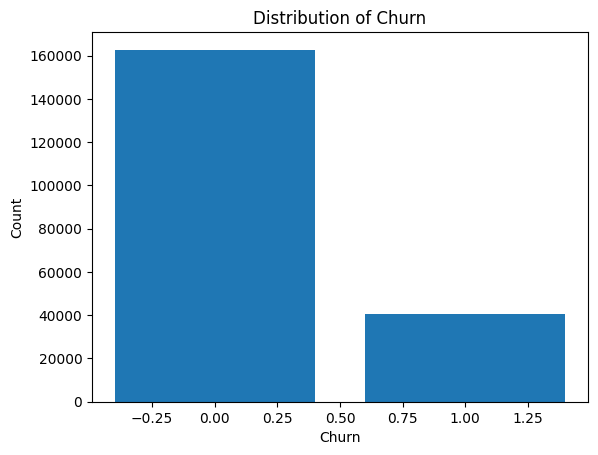

In [ ]:
import matplotlib.pyplot as plt

# Get the unique values and their counts from the 'churn' column
unique_values, counts = np.unique(dataset['churn'], return_counts=True)

# Create the bar chart
plt.bar(unique_values, counts)

# Set the title and labels
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Display the chart
plt.show()

### HeatMap

<Axes: >

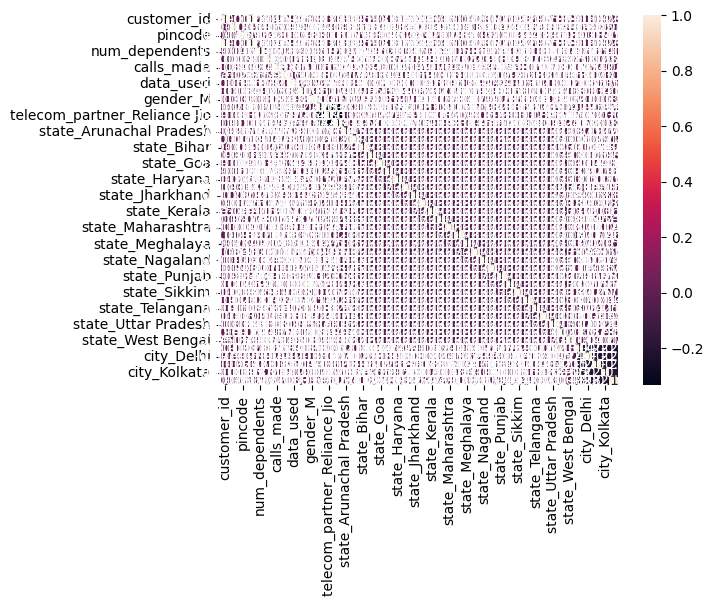

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

## Splitting the dataset into the Training set and Test set

In [ ]:
X = dataset.iloc[:, [i for i in range(dataset.shape[1]) if i != 9]].values # dropping index 9 depend variable
y = dataset.iloc[:, 9].values # getting index 9 churn or not

In [ ]:
print(X)

[[1 25 755597 ... False True False]
 [2 55 125926 ... False False True]
 [3 57 423976 ... False False False]
 ...
 [243551 59 520218 ... False True False]
 [243552 49 387744 ... False True False]
 [243553 37 139086 ... True False False]]


In [ ]:
print (y)

[0 0 1 ... 0 0 0]


### Spliting the data


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[223462 28 691785 ... False False False]
 [166462 27 312439 ... False False True]
 [229608 64 635213 ... False True False]
 ...
 [208781 31 955802 ... False True False]
 [229612 50 566290 ... False True False]
 [128038 50 527930 ... False False False]]


In [ ]:
print(X_test)

[[117756 34 109149 ... False False False]
 [144744 46 238914 ... False False False]
 [230482 39 519830 ... True False False]
 ...
 [101043 61 752664 ... False False False]
 [101958 29 470474 ... False False True]
 [223939 63 833879 ... False True False]]


In [ ]:
print(y_train)

[0 0 1 ... 1 0 0]


In [ ]:
print(y_test)

[0 1 0 ... 1 0 0]


# Applying Machine learning model


1] Logistic regression

In [ ]:
# Assuming Timestamps are in column index 2 of X_train
timestamps_col_index = 2  # Change this to the actual column index
X_train[:, timestamps_col_index] = X_train[:, timestamps_col_index].astype(np.int64) // 10**9


AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)